In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-health-dataset/Mental Health Dataset.csv


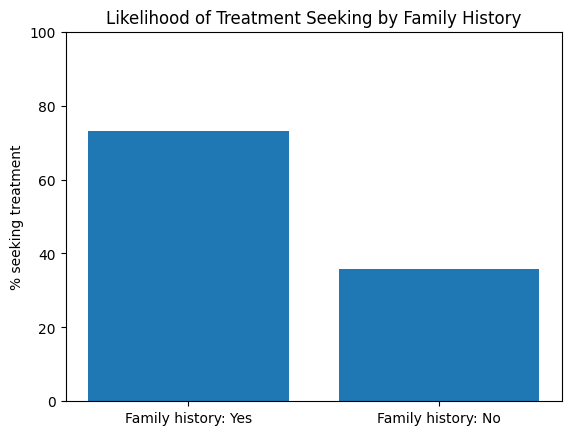

In [8]:
# imports and dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df_mhd = pd.read_csv('/kaggle/input/mental-health-dataset/Mental Health Dataset.csv')


# masks
fh_yes = (df_mhd['family_history'] == 'Yes')
fh_no  = (df_mhd['family_history'] == 'No')
treat  = (df_mhd['treatment'] == 'Yes')

# counts: how many with treatment inside each group
yes_seek = (fh_yes & treat).sum()
no_seek  = (fh_no  & treat).sum()

# group sizes
yes_total = fh_yes.sum()
no_total  = fh_no.sum()

# percentages
yes_pct = 100 * yes_seek / yes_total if yes_total else 0
no_pct  = 100 * no_seek  / no_total  if no_total  else 0

# plot
import matplotlib.pyplot as plt
plt.bar(['Family history: Yes','Family history: No'], [yes_pct, no_pct])
plt.ylabel('% seeking treatment')
plt.title('Likelihood of Treatment Seeking by Family History')
plt.ylim(0, 100)
plt.show()


Those with a family history of mental illness are much more likely to seek treatment.

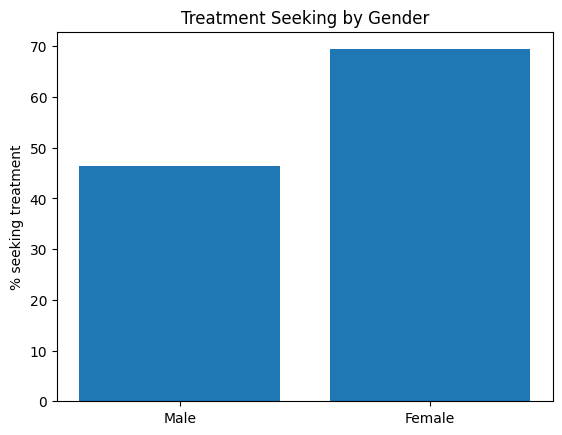

In [10]:
# comparing % of treatment seeking by gender
# counts
men_yes = len(df_mhd[(df_mhd['Gender'] == 'Male') & (df_mhd['treatment'] == 'Yes')])
men_total = len(df_mhd[df_mhd['Gender'] == 'Male'])
women_yes = len(df_mhd[(df_mhd['Gender'] == 'Female') & (df_mhd['treatment'] == 'Yes')])
women_total = len(df_mhd[df_mhd['Gender'] == 'Female'])

# percentages
men_pct = 100 * men_yes / men_total
women_pct = 100 * women_yes / women_total

# plot
plt.bar(['Male', 'Female'], [men_pct, women_pct])
plt.ylabel('% seeking treatment')
plt.title('Treatment Seeking by Gender')
plt.show()

As we can see, women are much more likely to seek treatment, other factors nonwithstanding.

In [6]:
import pandas as pd

df_mhd = pd.read_csv('/kaggle/input/mental-health-dataset/Mental Health Dataset.csv')

# grab each unique country to prepare for mapping
country_array = []
for x in df_mhd['Country']:
    if x not in country_array:
        country_array.append(x)
print(country_array)


['United States', 'Poland', 'Australia', 'Canada', 'United Kingdom', 'South Africa', 'Sweden', 'New Zealand', 'Netherlands', 'India', 'Belgium', 'Ireland', 'France', 'Portugal', 'Brazil', 'Costa Rica', 'Russia', 'Germany', 'Switzerland', 'Finland', 'Israel', 'Italy', 'Bosnia and Herzegovina', 'Singapore', 'Nigeria', 'Croatia', 'Thailand', 'Denmark', 'Mexico', 'Greece', 'Moldova', 'Colombia', 'Georgia', 'Czech Republic', 'Philippines']


In [1]:
import pandas as pd

df_mhd = pd.read_csv('/kaggle/input/mental-health-dataset/Mental Health Dataset.csv')

print(df_mhd.head())

         Timestamp  Gender        Country Occupation self_employed  \
0  8/27/2014 11:29  Female  United States  Corporate           NaN   
1  8/27/2014 11:31  Female  United States  Corporate           NaN   
2  8/27/2014 11:32  Female  United States  Corporate           NaN   
3  8/27/2014 11:37  Female  United States  Corporate            No   
4  8/27/2014 11:43  Female  United States  Corporate            No   

  family_history treatment Days_Indoors Growing_Stress Changes_Habits  \
0             No       Yes    1-14 days            Yes             No   
1            Yes       Yes    1-14 days            Yes             No   
2            Yes       Yes    1-14 days            Yes             No   
3            Yes       Yes    1-14 days            Yes             No   
4            Yes       Yes    1-14 days            Yes             No   

  Mental_Health_History Mood_Swings Coping_Struggles Work_Interest  \
0                   Yes      Medium               No            No   


/usr/local/lib/python3.11/dist-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/usr/local/lib/python3.11/dist-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/usr/local/lib/python3.11/dist-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/usr/local/lib/python3.11/dist-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


Accuracy: 0.7369726198416363


/usr/local/lib/python3.11/dist-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/usr/local/lib/python3.11/dist-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/usr/local/lib/python3.11/dist-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/usr/local/lib/python3.11/dist-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


,antecedents,consequents,support,confidence,lift
4,(care_options_encoded_0),(gender_encoded_0),0.052380,0.138890,1.590957
5,(gender_encoded_0),(care_options_encoded_0),0.052380,0.600000,1.590957
103,(country_encoded_0),"(family_history_encoded_0, care_options_encode...",0.078834,0.178044,1.467084
96,"(family_history_encoded_0, care_options_encode...",(country_encoded_0),0.078834,0.649590,1.467084
80,"(family_history_encoded_0, care_options_encode...",(country_encoded_0),0.050154,0.645841,1.458619
87,(country_encoded_0),"(family_history_encoded_0, care_options_encode...",0.050154,0.113272,1.458619
109,"(mood_swings_encoded_2, country_encoded_0)","(family_history_encoded_0, care_options_encode...",0.072269,0.525744,1.458489
106,"(family_history_encoded_0, care_options_encode...","(mood_swings_encoded_2, country_encoded_0)",0.072269,0.200486,1.458489
111,(country_encoded_0),"(family_history_encoded_0, mood_swings_encoded...",0.072269,0.163219,1.447517
104,"(family_history_encoded_0, mood_swings_encoded...",(country_encoded_0),0.072269,0.640926,1.447517


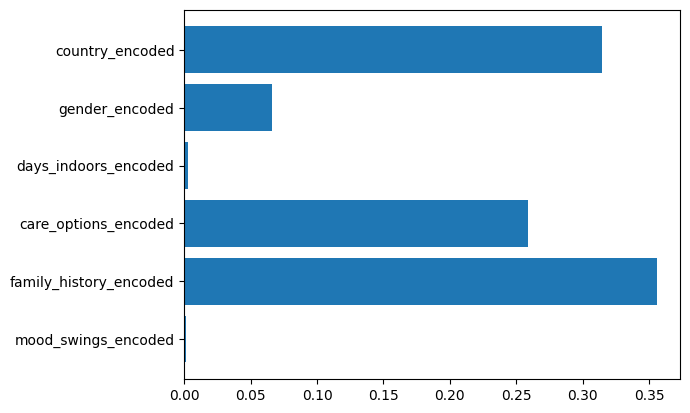

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

df_mhd = pd.read_csv('/kaggle/input/mental-health-dataset/Mental Health Dataset.csv')

# need to count number of unique values for each column of categorical data

def count_unique_values(col):
    unique_values_array = []

    for x in col:
        if x not in unique_values_array:
            unique_values_array.append(x)

    array_size = len(unique_values_array)
    return array_size

# function for integer encoding

def encode_categorical_data(col):
    encode_dict = {}
    encode_values = []
    index = 0

    # Build the dictionary dynamically
    for x in col:
        if x not in encode_dict:
            encode_dict[x] = index
            index += 1

    # Map the column using the dictionary
    encoded_series = col.map(encode_dict)
    encoded_series.name = f"{col.name}_encoded"
    return encoded_series


df_mhd['treatment'].value_counts(normalize=True)


#encode each column using our function and store the results

df_mhd['family_history_encoded'] = encode_categorical_data(df_mhd['family_history'])
df_mhd['gender_encoded'] = encode_categorical_data(df_mhd['Gender'])
df_mhd['care_options_encoded'] = encode_categorical_data(df_mhd['care_options'])
df_mhd['treatment_encoded'] = encode_categorical_data(df_mhd['treatment'])
df_mhd['days_indoors_encoded'] = encode_categorical_data(df_mhd['Days_Indoors'])
df_mhd['mood_swings_encoded'] = encode_categorical_data(df_mhd['Mood_Swings'])
df_mhd['changes_habits_encoded'] = encode_categorical_data(df_mhd['Changes_Habits'])
df_mhd['country_encoded'] = encode_categorical_data(df_mhd['Country'])

# pass columns to dictionary, create new DataFrame for the encoded data

encoded_dictionary = {
    'family_history_encoded': df_mhd['family_history_encoded'],
    'gender_encoded': df_mhd['gender_encoded'],
    'care_options_encoded': df_mhd['care_options_encoded'],
    'treatment_encoded': df_mhd['treatment_encoded'],
    'days_indoors_encoded': df_mhd['days_indoors_encoded'],
    'mood_swings_encoded': df_mhd['mood_swings_encoded'],
    'changes_habits_encoded': df_mhd['changes_habits_encoded'],
    'country_encoded' : df_mhd['country_encoded']
}

df_encoded = pd.DataFrame(data = encoded_dictionary)

# create test/train split

X = df_encoded[['mood_swings_encoded', 'family_history_encoded', 'care_options_encoded', 'days_indoors_encoded', 'gender_encoded', 'country_encoded']]
y = df_encoded['treatment_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train_np = X_train.astype(float)
X_test_np = X_test.astype(float)


# instantiate and pass data to DecisionTree

classifier = RandomForestClassifier(min_samples_split=2, n_estimators = 30, max_depth=100, random_state = 42, class_weight = 'balanced')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# evaluate model

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

plt.barh(X_train.columns, classifier.feature_importances_)

from sklearn.feature_selection import mutual_info_classif
import pandas as pd

importances = pd.Series(classifier.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(8).index
top_features

mba_df = df_mhd[top_features]
mba_df = pd.get_dummies(mba_df.astype(str))

from mlxtend.frequent_patterns import apriori, association_rules

preds = classifier.predict(X)
subset = mba_df[preds == 1]

# high support: should apply to large number of cases
# high confidence: should be correct often
# high lift: indicates relationship that isn't just coincidental


frequent_itemsets = apriori(subset, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=1.2)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False).head(10)


In [ ]:
# GridSearchCV imeplementation

param_grid = {
    'n_estimators': [1, 10, 30],
    'max_depth': [100, 200],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train, y_train)
print(grid.best_params_

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

cluster_features = ['mood_swings_encoded', 'days_indoors_encoded',
                    'changes_habits_encoded', 'care_options_encoded',
                    'family_history_encoded']

X_clust = df_encoded[cluster_features]

scaler = StandardScaler()
X_clust_scaled = scaler.fit_transform(X_clust)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_encoded['cluster'] = kmeans.fit_predict(X_clust_scaled)


NameError: name 'df_encoded' is not defined

Originally used a regular DecisionTree and the accuracy was 0.71, so we're going to try RandomForest.